In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/BTCUSDT.csv")
df

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,2017-08-17 04:00:59.999,7.564907e+03,3,0.075183,320.390851,0
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,2017-08-17 04:01:59.999,0.000000e+00,0,0.000000,0.000000,0
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,2017-08-17 04:02:59.999,1.117543e+03,2,0.261074,1117.542921,0
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,2017-08-17 04:03:59.999,5.117185e+01,3,0.012008,51.171852,0
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,2017-08-17 04:04:59.999,5.999993e+02,1,0.140796,599.999338,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3575465,2024-06-10 02:56:00,69721.42,69721.43,69700.00,69717.69,21.915850,2024-06-10 02:56:59.999000,1.527848e+06,563,7.493360,522364.476497,0
3575466,2024-06-10 02:57:00,69717.69,69717.70,69715.89,69715.89,5.537070,2024-06-10 02:57:59.999000,3.860293e+05,221,1.261270,87932.813545,0
3575467,2024-06-10 02:58:00,69715.89,69724.93,69715.89,69724.92,9.078770,2024-06-10 02:58:59.999000,6.329483e+05,340,5.296120,369236.976039,0
3575468,2024-06-10 02:59:00,69724.92,69724.93,69715.32,69716.00,12.614700,2024-06-10 02:59:59.999000,8.794528e+05,411,8.735730,609015.026616,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575470 entries, 0 to 3575469
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   close_time                    object 
 7   quote_asset_volume            float64
 8   number_of_trades              int64  
 9   taker_buy_base_asset_volume   float64
 10  taker_buy_quote_asset_volume  float64
 11  ignore                        int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 327.3+ MB


In [4]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,3.575470e+06,3.575470e+06,3.575470e+06,3.575470e+06,3.575470e+06,3.575470e+06,3.575470e+06,3.575470e+06,3.575470e+06,3575470.0
mean,2.337412e+04,2.338718e+04,2.336094e+04,2.337413e+04,4.955965e+01,1.167925e+06,1.015196e+03,2.465014e+01,5.789506e+05,0.0
std,1.821072e+04,1.822004e+04,1.820139e+04,1.821075e+04,9.310426e+01,2.311691e+06,1.760968e+03,4.743076e+01,1.187181e+06,0.0
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,8.169520e+03,8.174400e+03,8.164013e+03,8.169372e+03,1.056613e+01,1.274232e+05,1.730000e+02,4.743486e+00,5.599213e+04,0.0
50%,1.742399e+04,1.743117e+04,1.741692e+04,1.742382e+04,2.240080e+01,4.164027e+05,4.540000e+02,1.077528e+01,1.931813e+05,0.0
75%,3.646417e+04,3.648621e+04,3.644393e+04,3.646413e+04,4.990810e+01,1.293671e+06,1.047000e+03,2.494980e+01,6.321674e+05,0.0
max,7.377555e+04,7.377700e+04,7.368261e+04,7.377554e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07,0.0


In [5]:
# Save in df the columns 'timestamp', 'open', 'high', 'low', 'close', 'volume' 
df = df[['timestamp', 'close', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']]
df

# Only save the rows where the timestamp is the biggest value of the of the day


,timestamp,open,high,low,close,volume,number_of_trades
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,3
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,2
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,3
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1
...,...,...,...,...,...,...,...
3575465,2024-06-10 02:56:00,69721.42,69721.43,69700.00,69717.69,21.915850,563
3575466,2024-06-10 02:57:00,69717.69,69717.70,69715.89,69715.89,5.537070,221
3575467,2024-06-10 02:58:00,69715.89,69724.93,69715.89,69724.92,9.078770,340
3575468,2024-06-10 02:59:00,69724.92,69724.93,69715.32,69716.00,12.614700,411


In [6]:
# Convert data to DataFrame
df = pd.DataFrame(df)

# Convert the string timestamp column to datetime
df['date'] = pd.to_datetime(df['timestamp'])

df

,timestamp,open,high,low,close,volume,number_of_trades,date
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,3,2017-08-17 04:00:00
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0,2017-08-17 04:01:00
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,2,2017-08-17 04:02:00
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,3,2017-08-17 04:03:00
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1,2017-08-17 04:04:00
...,...,...,...,...,...,...,...,...
3575465,2024-06-10 02:56:00,69721.42,69721.43,69700.00,69717.69,21.915850,563,2024-06-10 02:56:00
3575466,2024-06-10 02:57:00,69717.69,69717.70,69715.89,69715.89,5.537070,221,2024-06-10 02:57:00
3575467,2024-06-10 02:58:00,69715.89,69724.93,69715.89,69724.92,9.078770,340,2024-06-10 02:58:00
3575468,2024-06-10 02:59:00,69724.92,69724.93,69715.32,69716.00,12.614700,411,2024-06-10 02:59:00


In [7]:
df.drop('timestamp', axis=1, inplace=True)
df

,open,high,low,close,volume,number_of_trades,date
0,4261.48,4261.48,4261.48,4261.48,1.775183,3,2017-08-17 04:00:00
1,4261.48,4261.48,4261.48,4261.48,0.000000,0,2017-08-17 04:01:00
2,4280.56,4280.56,4280.56,4280.56,0.261074,2,2017-08-17 04:02:00
3,4261.48,4261.48,4261.48,4261.48,0.012008,3,2017-08-17 04:03:00
4,4261.48,4261.48,4261.48,4261.48,0.140796,1,2017-08-17 04:04:00
...,...,...,...,...,...,...,...
3575465,69721.42,69721.43,69700.00,69717.69,21.915850,563,2024-06-10 02:56:00
3575466,69717.69,69717.70,69715.89,69715.89,5.537070,221,2024-06-10 02:57:00
3575467,69715.89,69724.93,69715.89,69724.92,9.078770,340,2024-06-10 02:58:00
3575468,69724.92,69724.93,69715.32,69716.00,12.614700,411,2024-06-10 02:59:00


In [8]:
# Check for the last row of the day
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the date and time separately
df['date_only'] = df['date'].dt.date
df['time_only'] = df['date'].dt.time

# Group by date and get the last entry for each day
last_time_of_day = df.groupby('date_only').tail(1)

last_time_of_day
last_time_of_day.to_csv('../data/raw/last_time_of_day.csv', index=False)
df = pd.read_csv('../data/raw/last_time_of_day.csv')
df


,open,high,low,close,volume,number_of_trades,date,date_only,time_only
0,4285.08,4285.08,4285.08,4285.08,0.000000,0,2017-08-17 23:59:00,2017-08-17,23:59:00
1,4108.37,4108.37,4108.37,4108.37,0.188541,3,2017-08-18 23:59:00,2017-08-18,23:59:00
2,4139.98,4139.98,4139.98,4139.98,0.000000,0,2017-08-19 23:59:00,2017-08-19,23:59:00
3,4069.13,4086.29,4069.13,4086.29,0.378809,4,2017-08-20 23:59:00,2017-08-20,23:59:00
4,4016.00,4016.00,4016.00,4016.00,0.196434,4,2017-08-21 23:59:00,2017-08-21,23:59:00
...,...,...,...,...,...,...,...,...,...
2485,70784.01,70799.07,70777.88,70799.06,9.695720,344,2024-06-06 23:59:00,2024-06-06,23:59:00
2486,69364.91,69364.92,69355.60,69355.60,7.320110,345,2024-06-07 23:59:00,2024-06-07,23:59:00
2487,69311.76,69311.76,69310.45,69310.46,2.667750,276,2024-06-08 23:59:00,2024-06-08,23:59:00
2488,69653.73,69653.74,69648.14,69648.14,1.487240,220,2024-06-09 23:59:00,2024-06-09,23:59:00


In [9]:
# Creating a new column with the promedio of the open and close columns
df['promedio'] = (df['open'] + df['close']) / 2
df

,open,high,low,close,volume,number_of_trades,date,date_only,time_only,promedio
0,4285.08,4285.08,4285.08,4285.08,0.000000,0,2017-08-17 23:59:00,2017-08-17,23:59:00,4285.080
1,4108.37,4108.37,4108.37,4108.37,0.188541,3,2017-08-18 23:59:00,2017-08-18,23:59:00,4108.370
2,4139.98,4139.98,4139.98,4139.98,0.000000,0,2017-08-19 23:59:00,2017-08-19,23:59:00,4139.980
3,4069.13,4086.29,4069.13,4086.29,0.378809,4,2017-08-20 23:59:00,2017-08-20,23:59:00,4077.710
4,4016.00,4016.00,4016.00,4016.00,0.196434,4,2017-08-21 23:59:00,2017-08-21,23:59:00,4016.000
...,...,...,...,...,...,...,...,...,...,...
2485,70784.01,70799.07,70777.88,70799.06,9.695720,344,2024-06-06 23:59:00,2024-06-06,23:59:00,70791.535
2486,69364.91,69364.92,69355.60,69355.60,7.320110,345,2024-06-07 23:59:00,2024-06-07,23:59:00,69360.255
2487,69311.76,69311.76,69310.45,69310.46,2.667750,276,2024-06-08 23:59:00,2024-06-08,23:59:00,69311.110
2488,69653.73,69653.74,69648.14,69648.14,1.487240,220,2024-06-09 23:59:00,2024-06-09,23:59:00,69650.935


In [10]:
# Set training data 
X = df[['open', 'high', 'low', 'close', 'volume', 'number_of_trades']]
Y = df['promedio']

X.shape, Y.shape


((2490, 6), (2490,))

In [11]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1992, 6), (498, 6), (1992,), (498,))

In [13]:
# Linear refression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
# Builing model
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [15]:
# Apply trained model to make prediction (on test set)
Y_pred = model.predict(X_test)

In [16]:
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))

print()

Coefficients: 
 [ 5.00000000e-01  4.16333634e-15 -4.37150316e-15  5.00000000e-01
  4.20844085e-16 -1.24249569e-16]
Intercept: 
 1.0913936421275139e-11
Mean squared error: 0.00
Coefficient of determination: 1.00



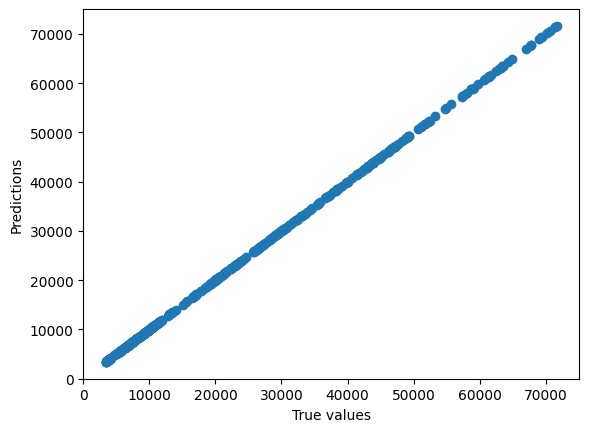

In [17]:
# Graphical representation
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()



In [18]:
# Now, creating a random forest model to predict the promedio column and future values on time
from sklearn.ensemble import RandomForestRegressor

# Building model
model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, Y_train)

# Apply trained model to make prediction (on test set)
Y_pred = model.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))

print()

# Graphical representation
plt.scatter(Y_test, Y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()




Mean squared error: 1029.14
Coefficient of determination: 1.00

